In [2]:
import  pandas as pd
import  numpy as np   
import  matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
#dataset
df=pd.read_csv("AIML Dataset.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.shape[0]

6362620

In [10]:
round(df["isFraud"].value_counts()[1]/ df.shape[0]*100,2)

np.float64(0.13)

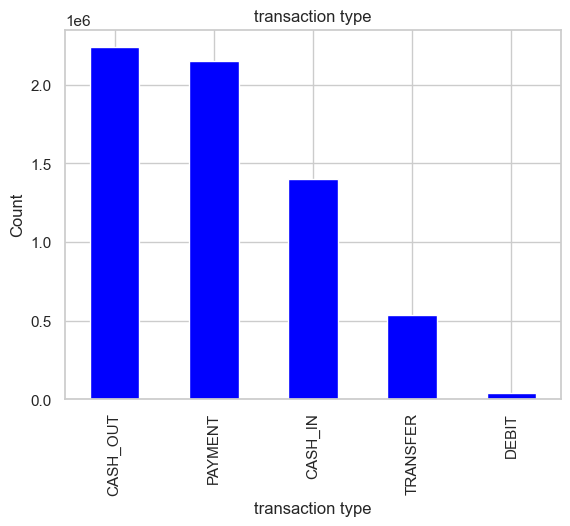

In [11]:
df["type"].value_counts().plot(kind="bar", title="transaction type",color= "blue")
plt.xlabel("transaction type")
plt.ylabel("Count")
plt.show()

In [ ]:
#fraud_by_type

NameError: name 'fraud_by_type' is not defined

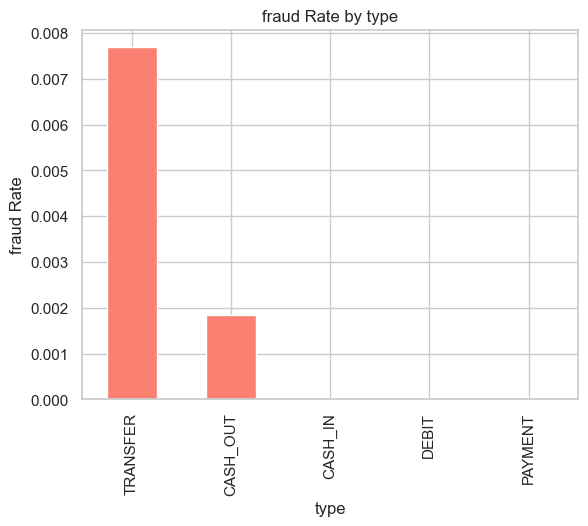

In [ ]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="fraud Rate by type",color="salmon")
plt.ylabel("fraud Rate")
plt.show()

In [ ]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

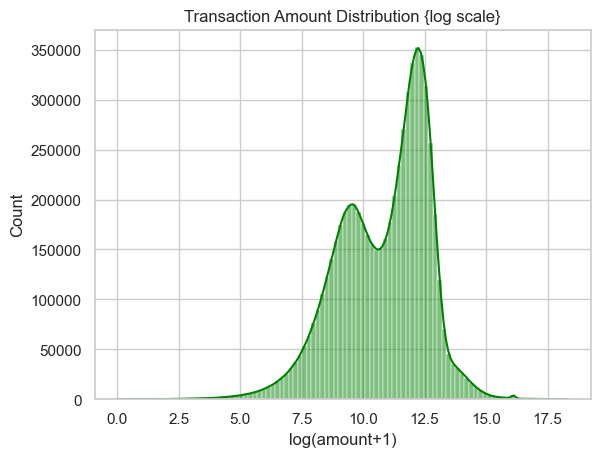

In [13]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True,color="green")
plt.title("Transaction Amount Distribution {log scale}")
plt.xlabel("log(amount+1)")
plt.show()

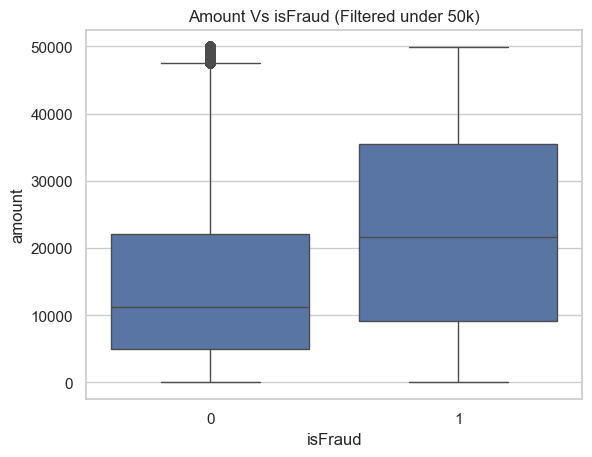

In [16]:
sns.boxplot(data=df[df["amount"] < 50000],x="isFraud", y="amount")
plt.title("Amount Vs isFraud (Filtered under 50k)")
plt.show()

In [6]:
df["balanceDiffOrig"]=df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"]=df["newbalanceDest"]- df["oldbalanceDest"]

In [7]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(1399253)

In [8]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

In [9]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


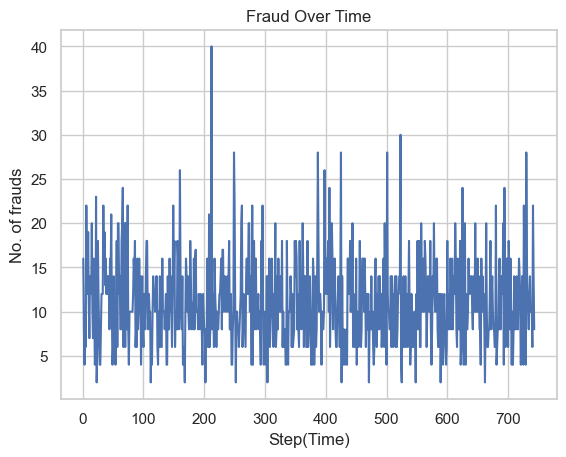

In [13]:
frauds_per_step=df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values,label="fraud per  Step")
plt.xlabel("Step(Time)")
plt.ylabel("No. of frauds")
plt.title("Fraud Over Time")
plt.grid(True)
plt.show()

In [14]:
df.drop(columns="step",inplace=True)

In [17]:
top_sender=df["nameOrig"].value_counts().head(10)

In [18]:
top_sender

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [19]:
top_receivers=df["nameDest"].value_counts().head(10)

In [20]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [21]:
fraud_user=df[df["isFraud"]== 1]["nameOrig"].value_counts().head(10)

In [22]:
fraud_user

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [26]:
fraud_type=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [27]:
fraud_type["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

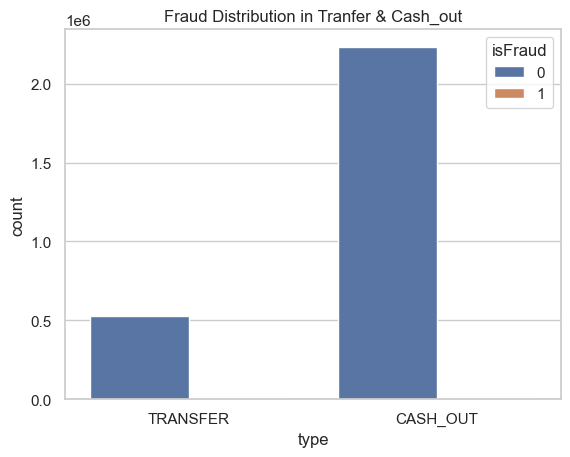

In [31]:
sns.countplot(data=fraud_type, x="type",hue="isFraud")
plt.title("Fraud Distribution in Tranfer & Cash_out")
plt.show()

In [33]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [ ]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


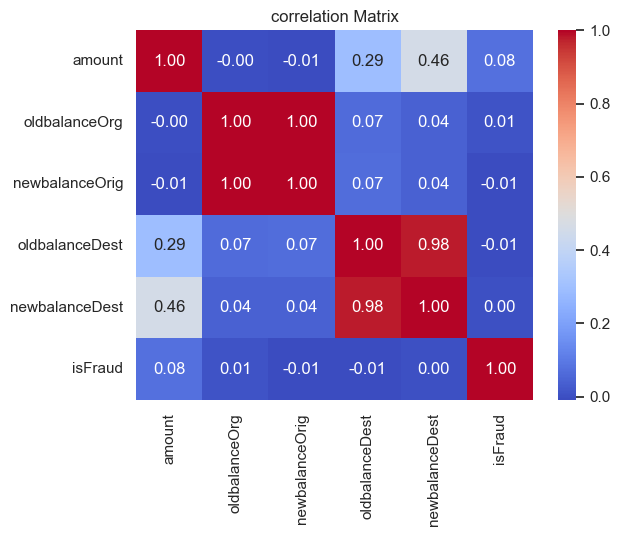

In [36]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation Matrix")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder